# MLOps-zoomcamp-2023-chap1-intro-hw

Use the "Run" button to execute the code.

## Download the Dataset

In [1]:
dataset_link_1 = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet"
dataset_link_2 = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet"

In [2]:
!pwd
!wget $dataset_link_1
!wget $dataset_link_2

/content
--2023-05-19 14:07:36--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 65.8.245.178, 65.8.245.171, 65.8.245.50, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|65.8.245.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38139949 (36M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2022-01.parquet’

yellow_tripdata_202 100%[===================>]  36.37M  59.2MB/s    in 0.6s    

2023-05-19 14:07:37 (59.2 MB/s) - ‘yellow_tripdata_2022-01.parquet’ saved [38139949/38139949]

--2023-05-19 14:07:37--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 65.8.245.178, 65.8.245.171, 65.8.245.50, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|65.8.245.178|:443... connecte

In [94]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [95]:
# Specify the file path of the parquet file
parquet_file_train = 'yellow_tripdata_2022-01.parquet'
parquet_file_val = 'yellow_tripdata_2022-02.parquet'


# Read the parquet file using pandas
df_train = pd.read_parquet(parquet_file_train)

## Data Analysis and Exploration

In [96]:
df_train.shape

(2463931, 19)

### Read the data for January. How many columns are there? `19`

### What's the standard deviation of the trips duration in January? 

In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [98]:
df_train['duration'] = df_train.tpep_dropoff_datetime - df_train.tpep_pickup_datetime
df_train.duration = df_train.duration.apply(lambda td: td.total_seconds() / 60)

<ipython-input-99-16a96132d705>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['duration'], label='duration')


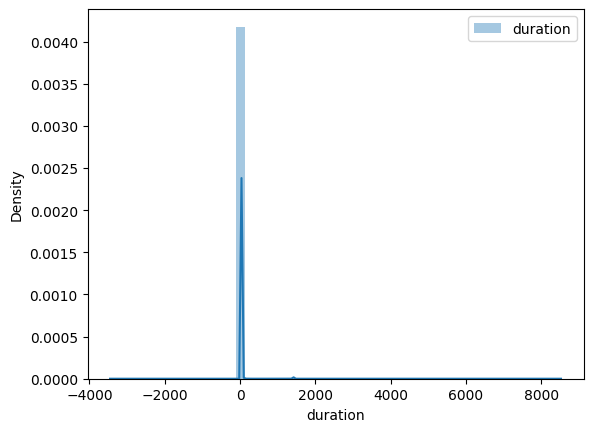

In [99]:
sns.distplot(df_train['duration'], label='duration')
plt.legend()

In [100]:
# Calculate the standard deviation of the column
std_dev = df_train['duration'].std()

# Print the result
print('Standard Deviation:', std_dev)

Standard Deviation: 46.44530513776802


What's the standard deviation of the trips duration in January? `46.445` ~ `46.45`

### What fraction of the records left after you dropped the outliers?

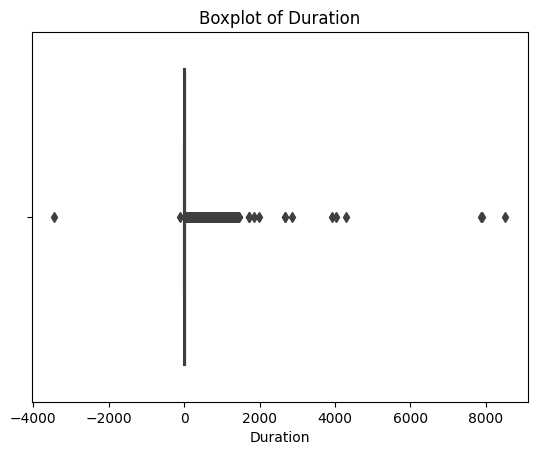

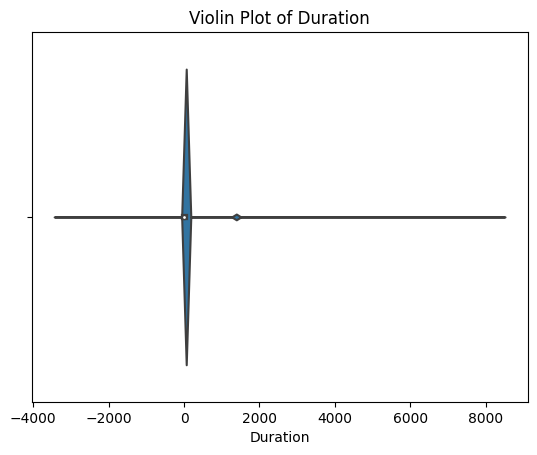

In [101]:
# Boxplot
sns.boxplot(x=df_train['duration'])
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()

# Violin plot
sns.violinplot(x=df_train['duration'])
plt.title('Violin Plot of Duration')
plt.xlabel('Duration')
plt.show()

In [102]:
df_train = df_train[(df_train.duration >= 1) & (df_train.duration <= 60)]

In [103]:
df_train.shape

(2421440, 20)

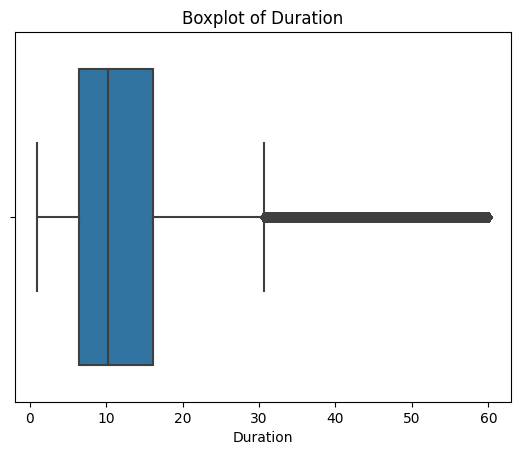

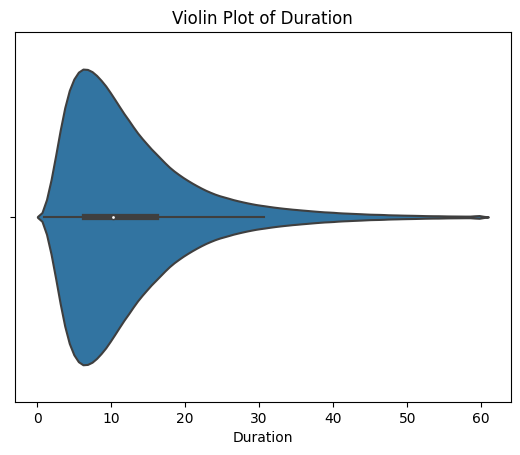

In [104]:
# Boxplot
sns.boxplot(x=df_train['duration'])
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()

# Violin plot
sns.violinplot(x=df_train['duration'])
plt.title('Violin Plot of Duration')
plt.xlabel('Duration')
plt.show()

Still the values could be trimmed by shriking the upper limit from `60` to `30`. But as the questions states to trim between 1 and 60 so we have to stick to the same.

In [105]:
print(f"The fraction of records left after dropping the otuliers is {round(df_train.shape[0]*100/2463931,2)} %")

The fraction of records left after dropping the otuliers is 98.28 %


### One-hot encoding

In [106]:
df_train.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [107]:
# selected_columns = ['PULocationID','DOLocationID']

In [108]:
categorical = ['PULocationID', 'DOLocationID']
numerical = []

In [109]:
def read_dataframe(filename):
    if filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [110]:
df_val = read_dataframe(parquet_file_val)
df_val.shape

(2918187, 20)

In [111]:
len(df_train), len(df_val)

(2421440, 2918187)

In [112]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [113]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [114]:
X_train.shape,type(X_train)

((2421440, 2), scipy.sparse._csr.csr_matrix)

In [115]:
print(X_train[0])

  (0, 0)	236.0
  (0, 1)	142.0


In [116]:
feature_names = dv.get_feature_names_out()
dimensionality = len(feature_names)
print(f'the dimensionality of this matrix (number of columns): {dimensionality}')

the dimensionality of this matrix (number of columns): 2


## Training a model

In [117]:
target = 'duration'
y_train = df_train[target].values

In [118]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
y_pred = lr.predict(X_train)

In [121]:
print(f'the RMSE of the model on the training data {mean_squared_error(y_train, y_pred, squared=False)}')

the RMSE of the model on the training data 8.920327827581444


In [122]:
# Plotting the distributions
def plot_distribution(actual, predicted):
  sns.distplot(actual, hist=True, kde=False, bins=10, label='Actual Values')
  sns.distplot(predicted, hist=True, kde=False, bins=10, label='Predicted Values')
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.legend()
  plt.title('Distribution of Predicted and Actual Values')
  plt.show()

<ipython-input-122-fc33e34a5dbe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(actual, hist=True, kde=False, bins=10, label='Actual Values')
<ipython-input-122-fc33e34a5dbe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predicted, hist=True, kde=False, bins=10, label='Predicted Values')


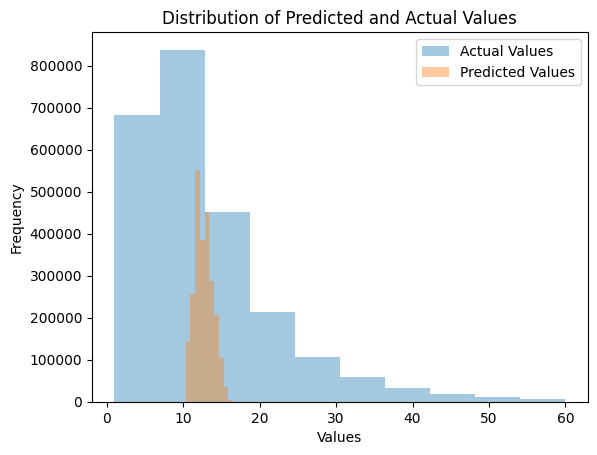

In [123]:
plot_distribution(y_train,y_pred)

## Evaluating the model

In [124]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [125]:
y_val = df_val[target].values

In [126]:
y_pred = lr.predict(X_val)

In [128]:
print(f'the RMSE of the model on the training data {mean_squared_error(y_val, y_pred, squared=False)}')

the RMSE of the model on the training data 10.032124095033593


<ipython-input-122-fc33e34a5dbe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(actual, hist=True, kde=False, bins=10, label='Actual Values')
<ipython-input-122-fc33e34a5dbe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predicted, hist=True, kde=False, bins=10, label='Predicted Values')


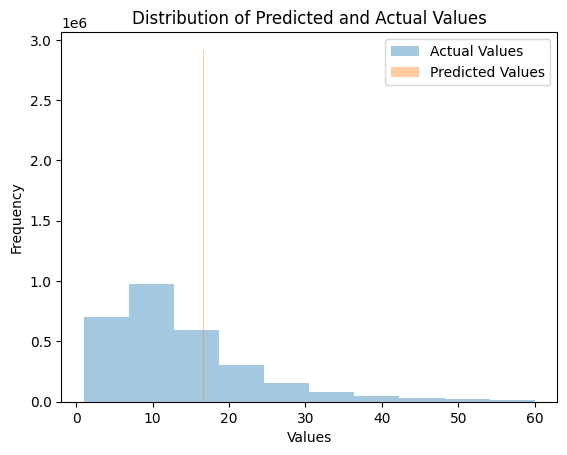

In [129]:
plot_distribution(y_val,y_pred)

In [130]:
y_pred

array([16.56034382, 16.56034382, 16.56034382, ..., 16.56034382,
       16.56034382, 16.56034382])

In [ ]:
# df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
# df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

## Similar things for the validation Dataset

In [ ]:
# df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime
# df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

# # Boxplot
# sns.boxplot(x=df_val['duration'])
# plt.title('Boxplot of Duration')
# plt.xlabel('Duration')
# plt.show()

# # Violin plot
# sns.violinplot(x=df_val['duration'])
# plt.title('Violin Plot of Duration')
# plt.xlabel('Duration')
# plt.show()

In [90]:
from sklearn.feature_extraction import DictVectorizer

# Create an instance of DictVectorizer
vectorizer = DictVectorizer()

# Fit the vectorizer to your data
data = [{'feature1': 2, 'feature2': 5}, {'feature1': 1, 'feature3': 3}]
vectorizer.fit(data)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Determine the dimensionality
dimensionality = len(feature_names)

# Print the dimensionality
print("Dimensionality:", dimensionality)

Dimensionality: 3


In [91]:
feature_names

array(['feature1', 'feature2', 'feature3'], dtype=object)